### **Proyecto Aprendizaje No Supervisado**

El siguiente proyecto se basa en la Encuesta Nacional de Calidad de vida 2018 realizada por el DANE, la cuál tiene como objetivo “Obtener información que permita analizar y realizar comparaciones de las condiciones socioeconómicas de los hogares colombianos, las cuales posibiliten hacer seguimiento a las variables necesarias para el diseño e implementación de políticas públicas.”

En el siguiente enlace se puede profundizar sobre esta encuesta y evaluar su ficha técnica, presentación, comunicado de prensa entre otros: https://www.dane.gov.co/index.php/estadisticas-por-tema/salud/calidad-de-vida-ecv/encuesta-nacional-de-calidad-de-vida-ecv-2019

Luego de analizar las diferentes encuestas en los diversos temas, se procede a analizar la encuestas de los datos de la vivienda, esta base de datos contiene información sobre las características de las diferentes viviendas en Colombia, en el siguiente link se encuentra el directorio de datos: https://microdatos.dane.gov.co/index.php/catalog/678/data-dictionary/F137?file_name=Datos%20de%20la%20vivienda

En el presente notebook, se pretende realizar un análisis estadístico de esta base de datos, estudiar los diferentes tipos de datos, estadísticas, gráficas y relaciones entre las diferentes variables.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
# Lee el archivo CSV
df = pd.read_csv('Datos de la vivienda.csv', sep=';')
df

,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,ORDEN,REGION,P1_DEPARTAMENTO,CANT_HOG_COMPLETOS,CANT_HOGARES_VIVIENDA,CLASE,P1070,...,P5661,P5661S1,P5661S2,P5661S3,P5661S4,P5661S9,P5661S5,P5661S6,P5661S7,FEX_C
0,7120001,1,1,1,1,13,1,1,1,2,...,,1,1,1,1,1,1,1,1,"208,34913730011"
1,7120002,1,1,1,1,13,1,1,1,1,...,,3,4,1,2,1,1,1,3,"306,477351890009"
2,7120005,1,1,1,1,13,1,1,1,1,...,,1,1,1,1,1,1,1,1,"175,390716700227"
3,7120006,1,1,1,1,13,1,1,1,2,...,,3,2,1,1,1,1,1,2,"187,543507465482"
4,7120007,1,1,1,1,13,1,1,1,2,...,,1,2,1,1,1,1,3,2,"384,099292579717"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93156,7247294,1,1,1,1,44,1,1,1,2,...,,2,2,2,1,1,2,2,3,"80,3358080123688"
93157,7247295,1,1,1,1,44,1,1,1,2,...,,2,2,2,1,1,1,1,2,"36,4810008317236"
93158,7247297,1,1,1,1,44,1,1,2,4,...,,1,1,1,2,1,1,2,2,"116,538531673999"
93159,7247298,1,1,1,4,27,1,1,1,2,...,,1,1,1,4,1,1,1,1,"51,6590649500192"


A través de la librería pandas y su función pandas.read_csv se lee el archivo de tipo CSV, ya que la distribución es a través del separador ";", se le asigna este separador al hiperparámetro "sep", se almacena entonces en un dataframe de pandas llamado df.

In [ ]:
print("Las dimensiones del dataframe con la base de datos del DANE sobre los datos de vivienda son son:", df.shape, " es decir, hay ",df.shape[0], "registros y ",df.shape[1],"atributos o características. \n")
print("El tamaño de la base de datos, es decir la cantidad total de datos es:", df.size, "\n")
print("Las filas están organizádas a través de un índice en el siguiente rango: ", df.index, "\n")
print("Los nombres de las columnas dentro de las base de datos son:", df.columns, "\n")
print("\nLa información básica de la base de datos es: \n")
print(df.info())
for column in df.columns:
    print(f"\nTítulo de la columna: {column}")
    unique_values = df[column].unique()
    print(f"\nValores únicos: {unique_values}")
    print("=" * 30)  # Separador visual entre columnas


Las dimensiones del dataframe con la base de datos del DANE sobre los datos de vivienda son son: (93161, 35)  es decir, hay  93161 registros y  35 atributos o características. 

El tamaño de la base de datos, es decir la cantidad total de datos es: 3260635 

Las filas están organizádas a través de un índice en el siguiente rango:  RangeIndex(start=0, stop=93161, step=1) 

Los nombres de las columnas dentro de las base de datos son: Index(['DIRECTORIO', 'SECUENCIA_ENCUESTA', 'SECUENCIA_P', 'ORDEN', 'REGION',
       'P1_DEPARTAMENTO', 'CANT_HOG_COMPLETOS', 'CANT_HOGARES_VIVIENDA',
       'CLASE', 'P1070', 'P4005', 'P4015', 'P4567', 'P8520', 'P8520S1',
       'P8520S1A1', 'P8520S5', 'P8520S3', 'P8520S4', 'P8520S4A1', 'P4065',
       'P4065S1', 'P4065S2', 'P4065S3', 'P4065S4', 'P5661', 'P5661S1',
       'P5661S2', 'P5661S3', 'P5661S4', 'P5661S9', 'P5661S5', 'P5661S6',
       'P5661S7', 'FEX_C'],
      dtype='object') 


La información básica de la base de datos es: 

<class 'pandas.core.fr

Como primera parte del análisis, se explora el dataframe creado a través de sus diferentes atributos.

-	Mediante el atributo “df.shape”, se exploran las dimensiones del dataframe, este tiene 93161 filas o registros y 35 columnas o características.

-	A través del atributo “df.size”, se explora el número total de datos, es decir la multiplicación entre las filas y las columnas.

-	A través del atributo “df.index”, se explora cómo están indexados los datos, en este caso la indexación la corriendo de 1 en 1 desde el 0 hasta el 93161.
-	Mediante le tributo “df.columns” se exploran los nombres de cada una de las columnas del dataframe.

Luego, se realiza un ciclo que explora los valores únicos por cada una de las columnas, además, en medio de esta exploración de atributos básicos del dataframe se explora el atributo df.info, en conjunto con la explicación del diccionario de datos del DANE se resumen las siguientes variables, su tipo, rango y explicación básica:

-	DIRECTORIO: no es más que el número de registro, su tipo es entero: int64.
-	SECUENCIA_ENCUESTA: consecutivo de la secuencia usada para la encuesta, en la base de datos luego de explorar a través de Python se observa que solo toma el valor de “1”, por lo cual no es muy relevante para el estudio, su tipo es entero: int64.
-	SECUENCIA_P:  consecutivo de la secuencia usada para la encuesta, en la base de datos luego de explorar a través de Python se observa que solo toma el valor de “1”, por lo cual no es muy relevante para el estudio, su tipo es entero: int64.
-	ORDEN: consecutivo de la secuencia usada para la encuesta, en la base de datos luego de explorar a través de Python se observa que solo toma el valor de “1”, por lo cual no es muy relevante para el estudio, su tipo es entero: int64.
-	REGION: representa la región del país en la cual se tomaron los datos, va de un rango de enteros del 1 al 9 distribuidos de la siguiente forma: 1 Caribe, 2 Oriental, 3 Central, 4 Pacífica(sin valle), 5 Bogotá, 6 Antioquia, 7 Valle del cauca, 8 San Andrés, 9 Orinoquía – amazonía, su tipo es entero categórico: int64.
-	P1_DEPARTAMENTO: es un identificador numérico para cada uno de los departamentos de Colombia, la variable tiene 33 valores únicos que representan cada uno de los departamentos, es de tipo entero: int64.
-	CANT_HOG_COMPLETOS: esta variable establece la cantidad de hogares completos que hay en una vivienda, la variable toma valores numéricos que van del rango 1 al 5, el tipo es entero: int64.
-	CANT_HOGARES_VIVIENDA: esta variable establece la cantidad de hogares que hay en una vivienda     int64
-	CLASE: variable categórica entera que toma los siguientes valores: 1 si es cabecera, 2 si son centros poblados, inspección de policía o corregimientos, es de tipo entero: int64.
-	P1070: variable que representa el tipo de vivienda de la siguiente forma: 1 Casa, 2 Apartamento, 3 Cuarto(s), 4 Vivienda tradicional indígena, 5 Otro (carpa, contenedor, vagón, embarcación, cueva, refugio natural, etc), la variable es de tipo numérico: int64
-	P4005: variable que representa el material predominante de las paredes exteriores, toma los siguientes valores enteros: 1 Bloque, ladrillo, piedra, madera pulida; 2 Tapia pisada, adobe; 3 Bahareque revocado; 4 Bahareque sin revocar; 5 Madera burda, tabla, tablón; 6 Material prefabricado; 7 Guadua, caña, esterilla, otro vegetal; 8 Zinc, tela, carbón, latas, desechos, plástico; 9 Sin paredes, su tipo es entero: int64.
-	P4015: variable que representa el material predominante de los pisos, toma los siguientes valores enteros: 1. Alfombra o tapete de pared a pared; 2. Madera pulida y lacada, parqué; 3. Mármol; 4. Baldosa, vinilo, tableta, ladrillo, laminado; 5. Madera burda, tabla, tablón, otro vegetal; 6. Cemento, gravilla; 7. Tierra, arena, su tipo es entero: int64.
-	P4567: variable que representa cuál es el material predominante del techo o cubierta, toma los siguientes valores enteros: 1 Plancha de concreto, cemento u hormigón; 2 Tejas de barro; 3 Teja de asbesto – cemento; 4 Teja metálica o lámina de zinc; 5 Teja plástica; 6 Paja, palma u otros vegetales; 7 Material de desecho (tela, cartón, latas, plástico, otros), su tipo es entero: int64
-	P8520: variable que representa con cuáles de los servicios públicos, privados o comunales cuenta la vivienda, en esta se evidencia que al explorar los datos en Python, el valor único de la variable es “ ”, por lo cual se concluye puede haber un error en esta variable, su tipo es objecto: object.
-	P8520S1: variable binaria que representa si se tiene energía eléctrica o no, toma el valor de 1 cuando cuenta con energía eléctrica y 2 cuando no, su tipo es entero: int64.
-	P8520S1A1: variable categórica entera que representa el estrato para tarifa de la siguiente forma: 1 Bajo – Bajo; 2 Bajo; 3 Medio – Bajo; 4 Medio; 5 Medio – Alto; 6 Alto; 8 Planta eléctrica; 9 No conoce el estrato o no cuenta con recibo de pago; 0 Recibos sin estrato o el servicio es pirata. Al analizar los tipos de datos en Python se observa que estos son de tipos “srt” y que hay valores vacíos, el tipo de datos en Python es un objeto: object.
-	P8520S5: variable categórica entera que representa si se cuenta con acueducto o no, toma el valor de 1 si tiene acueducto y 2 si no lo tiene, el tipo de datos es entero: int64.
-	P8520S3: variable categórica entera que representa si se cuenta con alcantarillado o no, toma el valor de 1 si tiene alcantarillado y 2 si no lo tiene, el tipo de datos es entero: int64.
-	P8520S4: variable categórica entera que representa si se cuenta con recolección de basuras o no, toma el valor de 1 si tiene recolección de basuras y 2 si no lo tiene, el tipo de datos es entero: int64.
-	P8520S4A1: variable categórica entera que toma valores del 0 al 9 y representa la priodicidad mediante la cual se hace recolección de basuras, sus valores son de tipo “str” y el tipo de datos es un objeto: object.
-	P4065: variable categórica que indaga si la vivienda a sido afectada por destrucción parcial o total por desastres naturales, al analizar los datos en Python se encuentra que esta columna solo toma valores de “ ”, por lo cual se concluye que los datos de esta columna no son útiles para el estudio, el tipo de variable en Python es un objeto: object.
-	P4065S1: variable categórica entera que representa si se han presentado inundaciones o desbordamientos de crecientes o arroyos o no, toma el valor de 1 si se han presentado inundaciones o desbordamientos de crecientes o arroyos y 2 si no, el tipo de datos es entero: int64.
-	P4065S2: variable categórica entera que representa si se han presentado avalanchas, derrumbes, deslizamientos o no, toma el valor de 1 si se han presentado avalanchas, derrumbes, deslizamientos y 2 si no, el tipo de datos es entero: int64.
-	P4065S3: variable categórica entera que representa si se ha presentado hundimiento de terreno o no, toma el valor de 1 si se ha presentado hundimiento de terreno y 2 si no, el tipo de datos es entero: int64.
-	P4065S4: variable categórica entera que representa si se han presentado ventarrones, tormenta, vendavales o no, toma el valor de 1 si se han presentado ventarrones, tormenta, vendavales y 2 si no, el tipo de datos es entero: int64.
-	P5661: variable que intenta explicar la frecuencia en la cual se han presentado ciertos problemas de tipo ambiental en el sector, luego de analizar los datos en Python se obtiene que los valores únicos de esa variable son “ ”, por lo cual la columna está vacía y no representa nada para el estudio, el tipo de datos en Python es un objeto: object
-	P5661S1: variable categórica entera que representa el ruido proveniente del exterior de la siguiente manera: 1. Nunca; 2. Algunas veces; 3. Muchas veces; 4. Siempre, es de tipo entero: int64.
-	P5661S2: variable categórica entera que representa malos olores provenientes del exterior de la siguiente manera: 1. Nunca; 2. Algunas veces; 3. Muchas veces; 4. Siempre, es de tipo entero: int64.
-	P5661S3: variable categórica entera que representa la presencia de basuras en las calles, caminos, senderos y espacios públicos de la siguiente manera: 1. Nunca; 2. Algunas veces; 3. Muchas veces; 4. Siempre, es de tipo entero: int64.
-	P5661S4: variable categórica entera que representa la contaminación del aire de la siguiente manera: 1. Nunca; 2. Algunas veces; 3. Muchas veces; 4. Siempre, es de tipo entero: int64.
-	P5661S9: variable categórica entera que representa la contaminación en ríos, canales, lagos y embalses de la siguiente manera: 1. Nunca; 2. Algunas veces; 3. Muchas veces; 4. Siempre, es de tipo entero: int64.
-	P5661S5: variable categórica entera que representa la invasión del espacio público (calles o andenes) de la siguiente manera: 1. Nunca; 2. Algunas veces; 3. Muchas veces; 4. Siempre, es de tipo entero: int64.
-	P5661S6: variable categórica entera que representa la presencia de animales que causan molestias de la siguiente manera: 1. Nunca; 2. Algunas veces; 3. Muchas veces; 4. Siempre, es de tipo entero: int64.
-	P5661S7: variable categórica entera que representa la presencia de animales que causan molestias de la siguiente manera: 1. Nunca; 2. Algunas veces; 3. Muchas veces; 4. Siempre, es de tipo entero: int64.
-	FEX_C: variable categórica con datos en forma de “str” de carácter numérico de tipo float, la variable cuantifica de forma numérica el factor de expansión y se almacena en un tipo de dato de Python objeto: object.


In [ ]:
columns_to_drop = ['SECUENCIA_ENCUESTA', 'SECUENCIA_P', 'ORDEN', 'P8520', 'P4065', 'P5661', 'P8520S1', 'P8520S4','P4065S4']
df = df.drop(columns=columns_to_drop)
binary_columns = ['CLASE', 'P8520S5', 'P8520S3', 'P4065S1', 'P4065S2', 'P4065S3']
df[binary_columns] = df[binary_columns].replace(2, 0)
df = df[df.applymap(lambda x: x != " ").all(axis=1)]
#df['FEX_C'] = df['FEX_C'].astype(float), no puede convertir string a float '208,34913730011'
df['P8520S1A1'] = df['P8520S1A1'].astype(int)
df['P8520S4A1'] = df['P8520S4A1'].astype(int)
df

<ipython-input-69-d0d4a502433a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P8520S1A1'] = df['P8520S1A1'].astype(int)
<ipython-input-69-d0d4a502433a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P8520S4A1'] = df['P8520S4A1'].astype(int)


,DIRECTORIO,REGION,P1_DEPARTAMENTO,CANT_HOG_COMPLETOS,CANT_HOGARES_VIVIENDA,CLASE,P1070,P4005,P4015,P4567,...,P4065S3,P5661S1,P5661S2,P5661S3,P5661S4,P5661S9,P5661S5,P5661S6,P5661S7,FEX_C
0,7120001,1,13,1,1,1,2,1,4,3,...,0,1,1,1,1,1,1,1,1,"208,34913730011"
1,7120002,1,13,1,1,1,1,1,4,3,...,1,3,4,1,2,1,1,1,3,"306,477351890009"
2,7120005,1,13,1,1,1,1,1,4,3,...,1,1,1,1,1,1,1,1,1,"175,390716700227"
3,7120006,1,13,1,1,1,2,1,4,3,...,0,3,2,1,1,1,1,1,2,"187,543507465482"
4,7120007,1,13,1,1,1,2,1,4,3,...,0,1,2,1,1,1,1,3,2,"384,099292579717"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93155,7247293,1,44,1,1,1,3,1,7,4,...,0,1,2,2,1,2,1,1,2,"49,340596628125"
93156,7247294,1,44,1,1,1,2,1,6,3,...,0,2,2,2,1,1,2,2,3,"80,3358080123688"
93157,7247295,1,44,1,1,1,2,1,6,3,...,0,2,2,2,1,1,1,1,2,"36,4810008317236"
93159,7247298,4,27,1,1,1,2,1,4,4,...,0,1,1,1,4,1,1,1,1,"51,6590649500192"


Luego de explorar los atributos básicos del dataframe y estructura de datos se concluye que ciertas columnas no aportan mucho al modelo, además de esto otras requiren ciertas transformaciones, por lo cual se realizan los siguientes cambios:

- Se eliminan las siguientes columnas ya que o bien tienen elementos vacíos en forma de espacio en cadenas de texto (" ") o tienen un solo elemento por columna lo cual no aporta nada al estudio: 'SECUENCIA_ENCUESTA', 'SECUENCIA_P', 'ORDEN', 'P8520', 'P4065', 'P5661'.

- Se transforman las clases binarias ya que la base de datos considera los "1" como una respuesta de un "Si" en la encuesta y los "0" como una respuesta de un "No" en la encuesta, se cambian entonces los "2" por "0" en las siguientes columnas: CLASE', 'P8520S1', 'P8520S5', 'P8520S3', 'P8520S4', 'P4065S1', 'P4065S2', 'P4065S3', 'P4065S4'.

- Se eliminan las filas de aquellas observaciones con " " como registro ya que estos son falsos positivos, nos hacen pensar que el registro no está vacío ya que " " es interpretado por python como una cadena de texto, sin embargo esto no nos aporta nada al modelo y puede entorpecer los análisis posteriores por lo que símplemente se eliminan estos registros.

- Se convierten los registros numéricos que están almacenados en forma de texto, se hace entonces la conversión de tipo de datos a las columnas 'P8520S1A1' y 'P8520S4A1'.

realizar los cambios mencionados con anterioridad se obtiene un dataframe reducido con 58772 filas y 29 columnas con el cual se proceden a hacer las descripciones estadísticas.


Estadísticas Descriptivas para las columnas binarias: 

              CLASE       P8520S5       P8520S3       P4065S1       P4065S2  \
count  58772.000000  58772.000000  58772.000000  58772.000000  58772.000000   
mean       0.814231      0.899187      0.762761      0.059858      0.008048   
std        0.388923      0.301084      0.425394      0.237226      0.089350   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      1.000000      0.000000      0.000000   
50%        1.000000      1.000000      1.000000      0.000000      0.000000   
75%        1.000000      1.000000      1.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            P4065S3  
count  58772.000000  
mean       0.018580  
std        0.135038  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

Proporciones de 1s en Columnas Bi

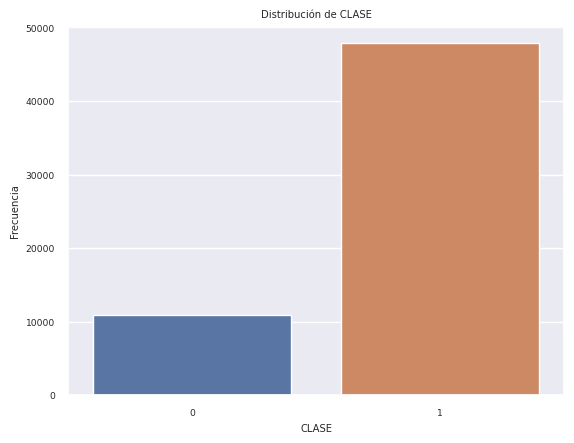

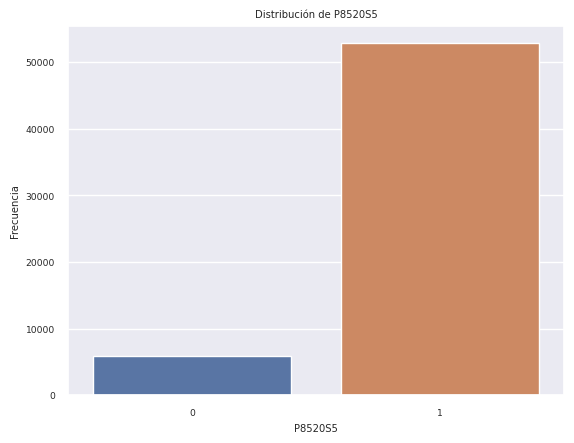

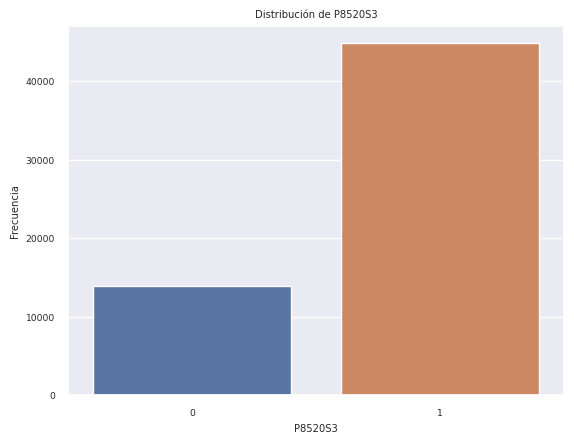

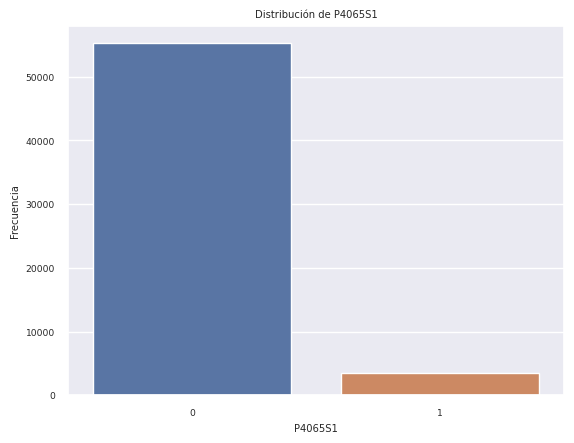

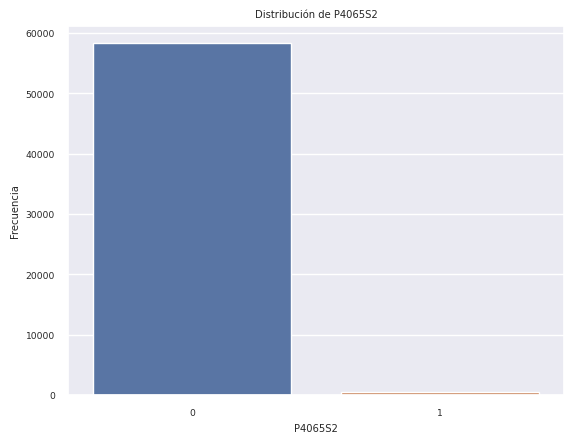

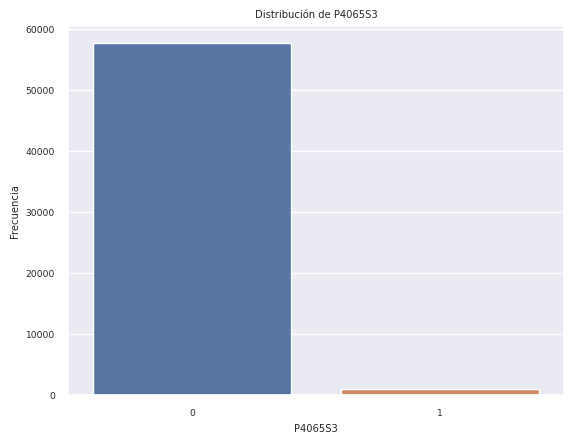

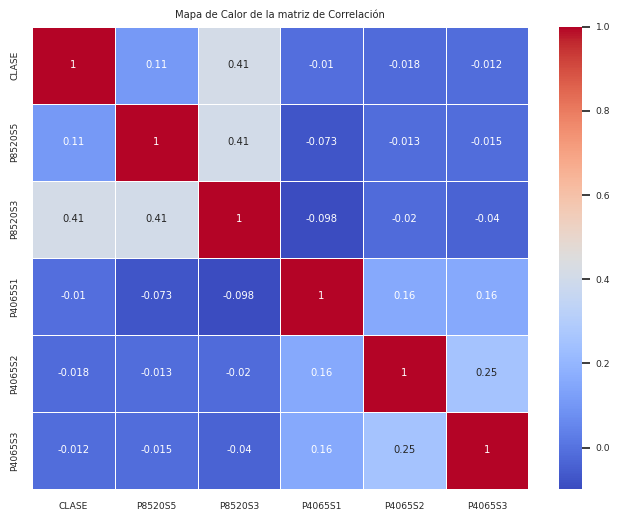

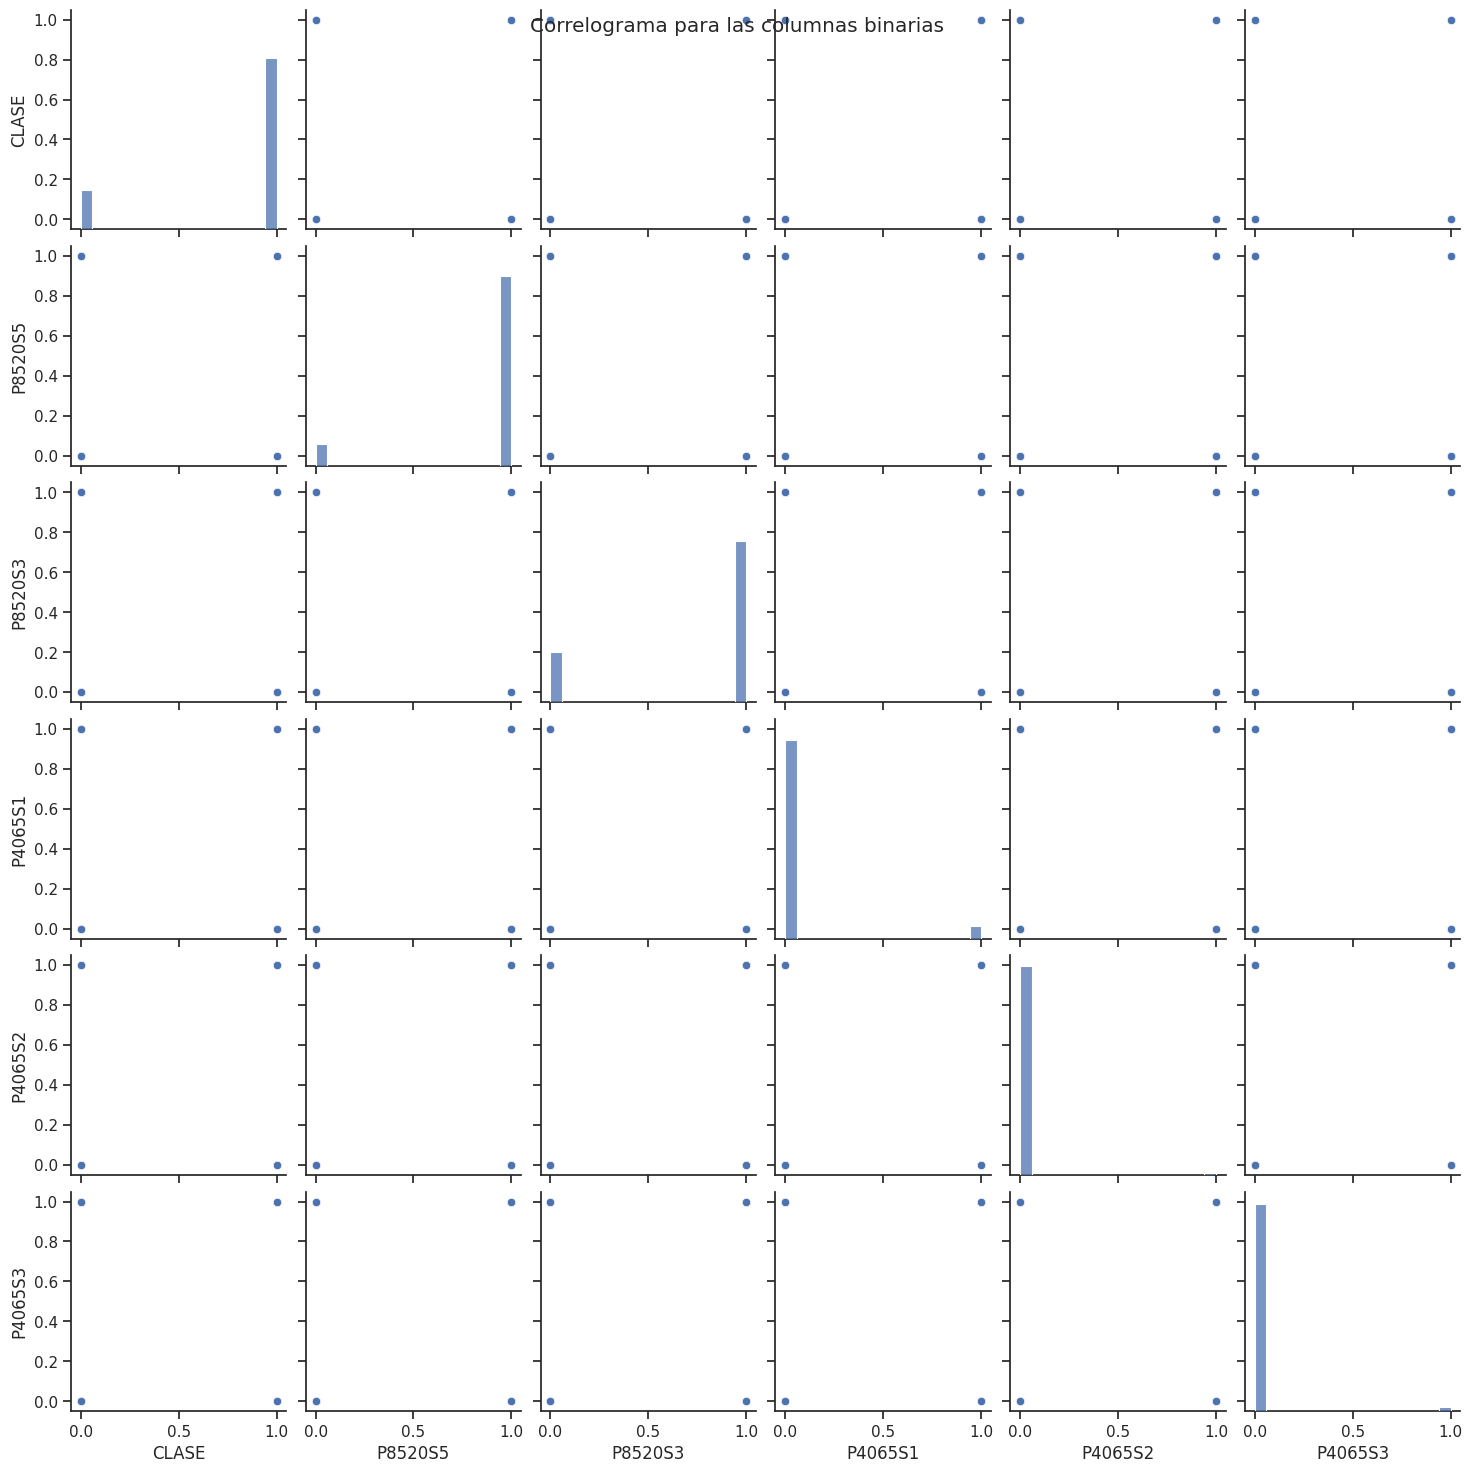

In [ ]:
#Se separan los 3 tipos de variables para hacer los diferentes análisis estadísticos.

# Columnas binarias
binarias = ['CLASE', 'P8520S5', 'P8520S3', 'P4065S1', 'P4065S2', 'P4065S3']
# Columnas categóricas
categoricas = ['REGION', 'P1_DEPARTAMENTO', 'CANT_HOG_COMPLETOS', 'CANT_HOGARES_VIVIENDA',
               'P1070', 'P4005', 'P4015', 'P4567', 'P8520S1A1', 'P8520S4A1', 'P5661S1',
               'P5661S2', 'P5661S3', 'P5661S4', 'P5661S9', 'P5661S5', 'P5661S6', 'P5661S7']
# Columna de texto
texto = 'FEX_C'


# Calcular estadísticas descriptivas para las columnas binarias
desc_stats_binarias = df[binarias].describe()
# Calcular la proporción de 1s en cada columna binaria
proporciones = df[binarias].mean()
# Mostrar las estadísticas descriptivas y las proporciones
print("Estadísticas Descriptivas para las columnas binarias: \n")
print(desc_stats_binarias)
print("\nProporciones de 1s en Columnas Binarias:")
print(proporciones)


print("\nGráficos de barras para evaluar la frecuencia de las variables binarias: \n")
# Gráficos para columnas binarias
for col in binarias:
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de {col}')

print("\nMatriz de correlación para los datos binarios: \n")
# Calcular la matriz de correlación
correlation_matrix = df[binarias].corr()
print(correlation_matrix)

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la matriz de Correlación')
plt.show()

# Crear un correlograma
sns.set(style="ticks")
sns.pairplot(df[binarias], kind="scatter")
plt.suptitle('Correlograma para las columnas binarias')
plt.show()



Ya que se encuentran variables binarias, categóricas numéricas y una de texto se separan entonces los 3 tipos de variables con el fin de hacer análisis descriptivos separados para las variables.

Se empieza entonces con un análisis a las variables binarias, se realizan analíticas descriptivas a través del atributo “.describe()”, ya que estamos hablando de variables binarias, podemos entonces analizar estas estadísticas desde la perspectiva de proporción de unos y ceros que para el caso de estudio serían respuestas positivas y negativas respectivamente. Así entonces, a través del cuadro generado para cada característica se puede analizar que por ejemplo, para la variable “P8520S5” la cual toma el valor de “1” cuando el encuestado tiene presencia de acueducto en su hogar y “0” cuando no, se observa una media de 0.8991 lo cual desde la óptica del análisis de variables vinarias se traduciría en que en promedio 89.91% de los hogares colombianos encuestados cuentan con acueducto, mientras que el 10.09% restante no, también puede observarse la desviación estándar de este valor que es 0.3010 y nos da una idea de la variabilidad de los datos alrededor de la media, la función también nos arroja valores mínimos, máximos y cuartiles, sin embargo al ser variables binarias son estadísticas que quizá no nos brindan mucha información para nuestro estudio. A nivel general, en todas las estadísticas se observa una predominancia de media alta en los valores lo cual se traduce a que la mayoría de los encuestados respondieron “si” para estas preguntas, en la mayoría por encima del 80%.

Para puntualizar en el análisis anterior, y a través de la librería Matplotlip, se realizan gráficas de cada una de estas variables binarias con el fin de evaluar la distribución de cada variable, primero, puede concluirse por medio de estas que todas las clases están desbalanceadas, hay siempre una predominancia marcada por uno de los posibles valores de la variable binaria.
Finalmente, se evalúa la relación lineal entre las variables binarias a través de 3 elementos: la matriz de correlaciones, el mapa de calor y el correlograma. A través de la matriz de correlaciones, se expresa a través de una tabla la relación lineal entre los pares posibles de variables, este mismo análisis de ve reflejado de forma gráfica en el mapa de calor el cual toma valores cercanos a rojo a medida que va aumentando la relación lineal positiva entre los variables y a azul cuando aumenta la relación lineal negativa. En las variables, puede observarse que no hay una predominancia marcada de relaciones lineales entre las variables, las variables más correlacionadas son “P4065S3” y “P4065S2” con una relación lineal positiva de 0.25. Estos datos también se ven también respaldados por el correlograma que no es más que un gráfico que representa la dispersión por puntos de cada par de variables, en el ejercicio no se evidencia presencia de algún comportamiento lineal entre los pares de variables.


Estadísticas Descriptivas para las columnas categóricas numéricas: 

             REGION  P1_DEPARTAMENTO  CANT_HOG_COMPLETOS  \
count  58772.000000     58772.000000        58772.000000   
mean       3.854557        45.871708            1.012217   
std        2.715334        29.175437            0.133742   
min        1.000000         5.000000            1.000000   
25%        2.000000        18.000000            1.000000   
50%        3.000000        47.000000            1.000000   
75%        6.000000        70.000000            1.000000   
max        9.000000        99.000000            5.000000   

       CANT_HOGARES_VIVIENDA         P1070         P4005         P4015  \
count           58772.000000  58772.000000  58772.000000  58772.000000   
mean                1.012217      1.362707      1.406554      4.781495   
std                 0.133742      0.552361      1.240902      1.058433   
min                 1.000000      1.000000      1.000000      1.000000   
25%                 

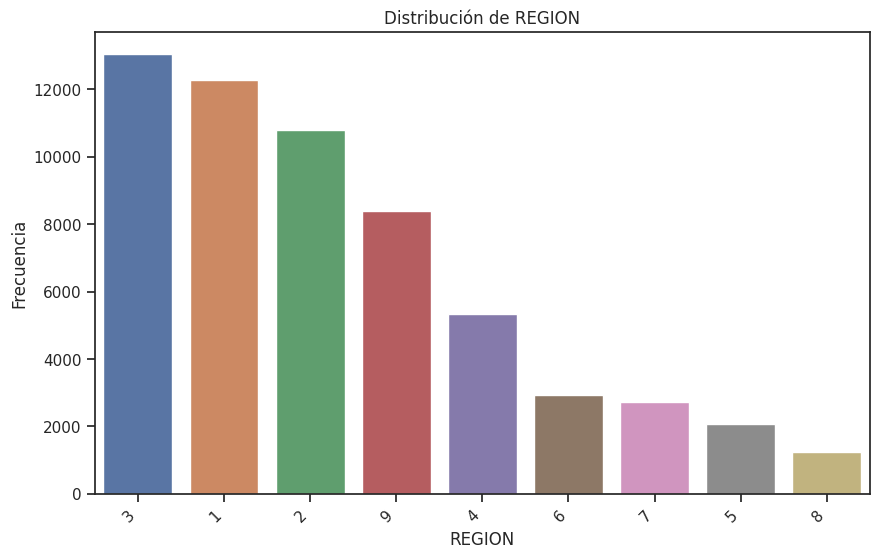

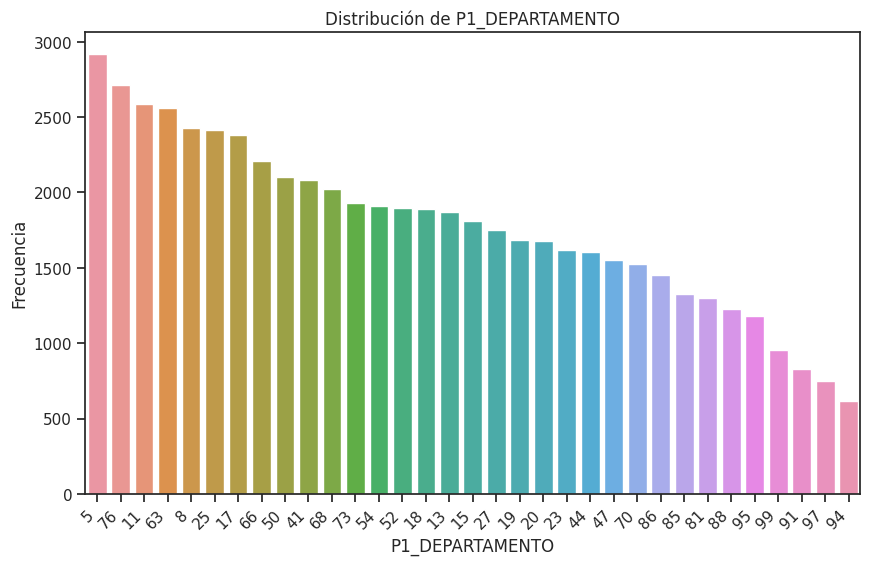

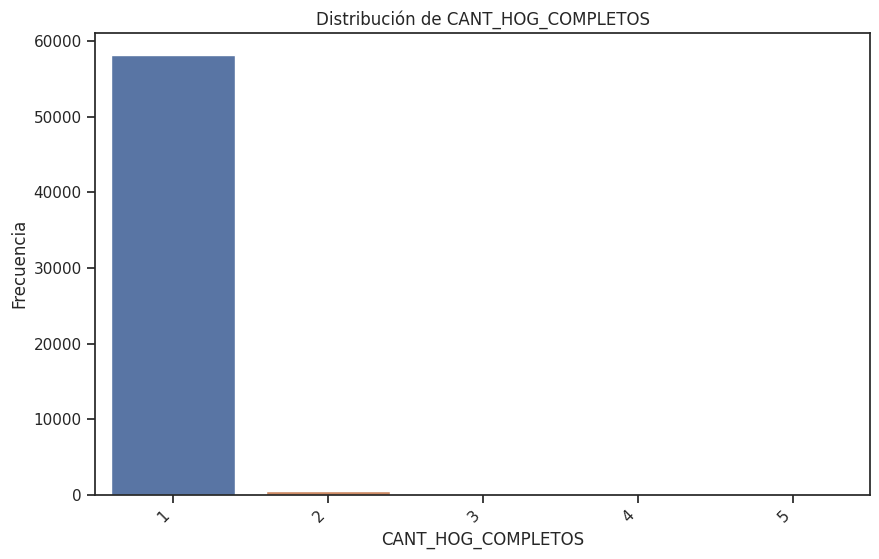

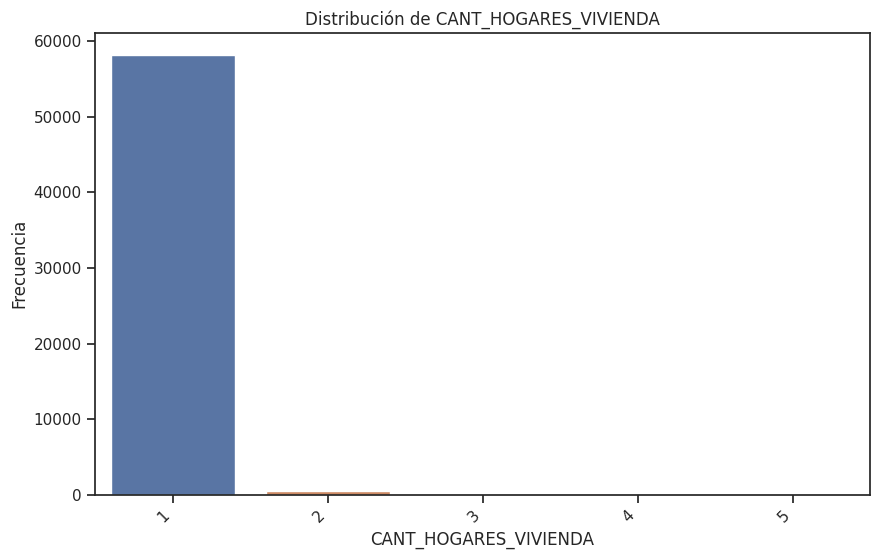

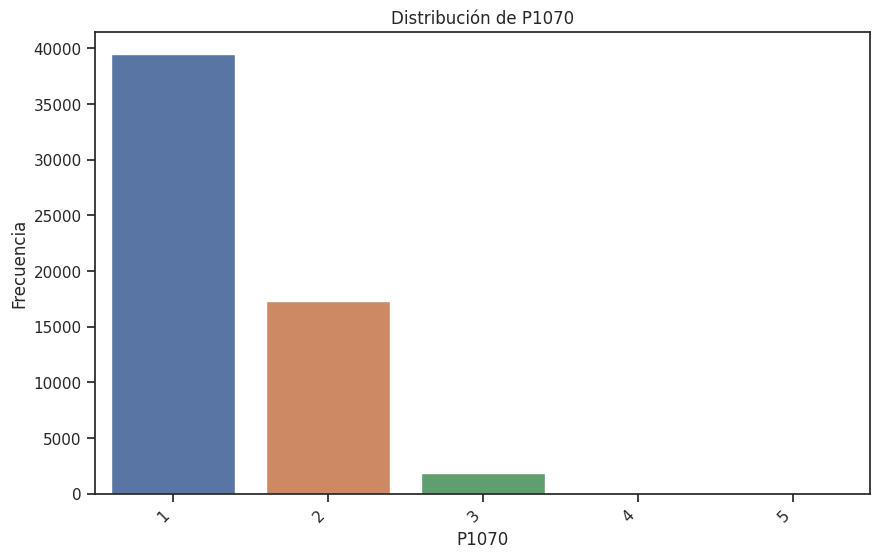

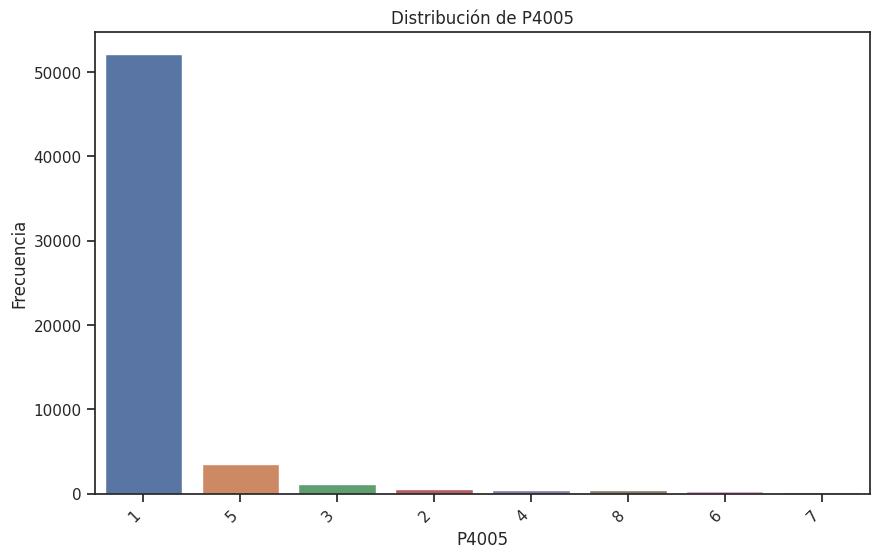

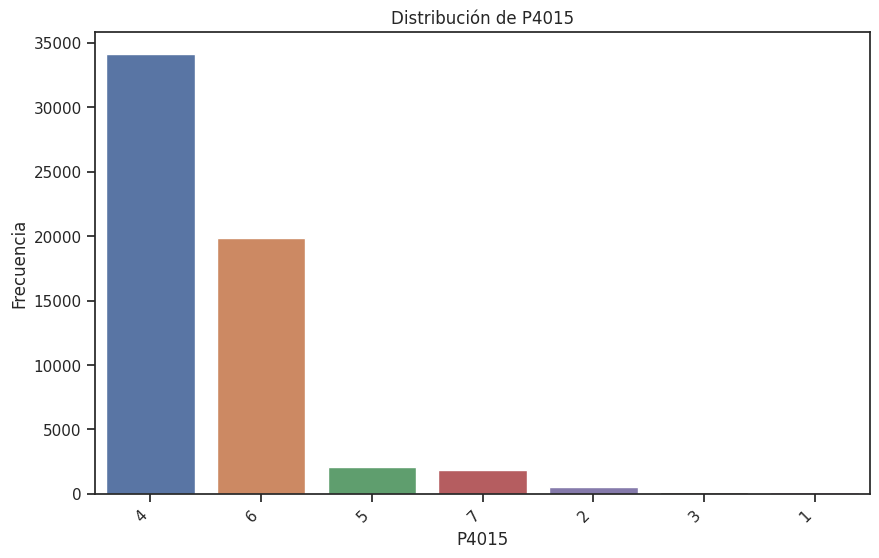

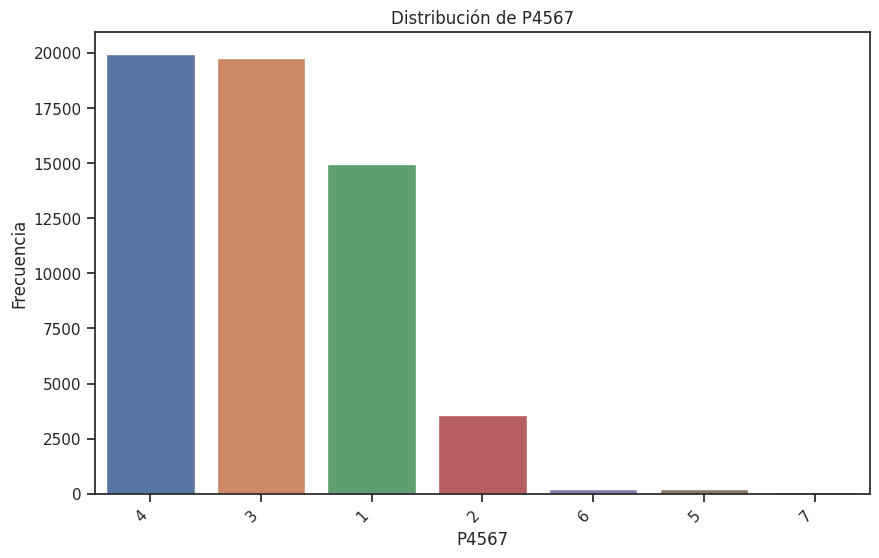

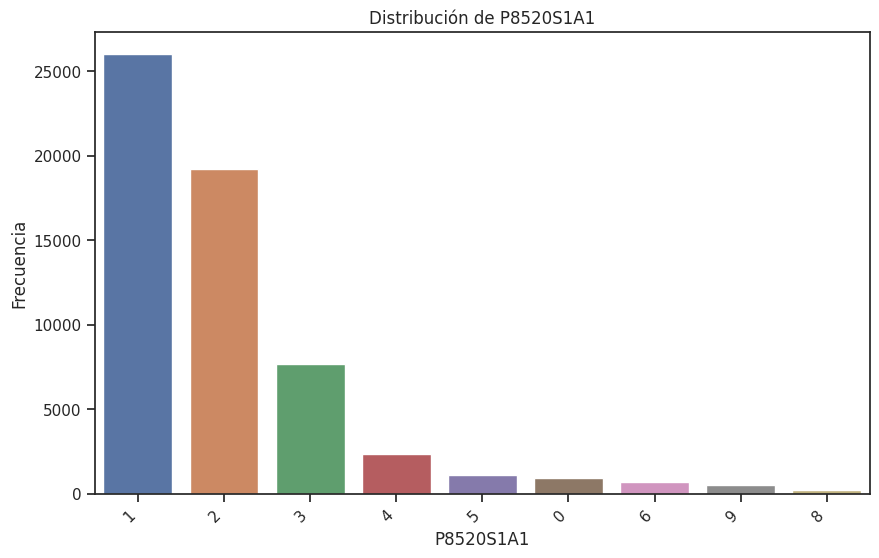

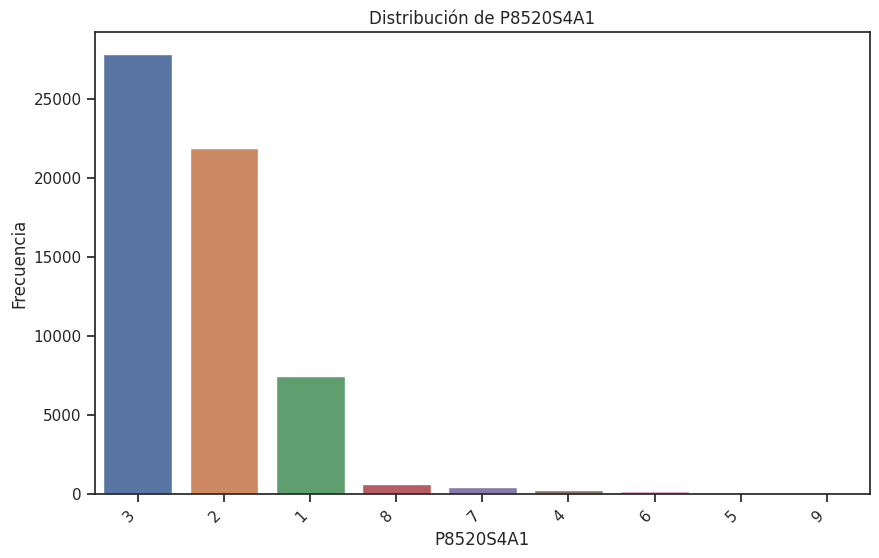

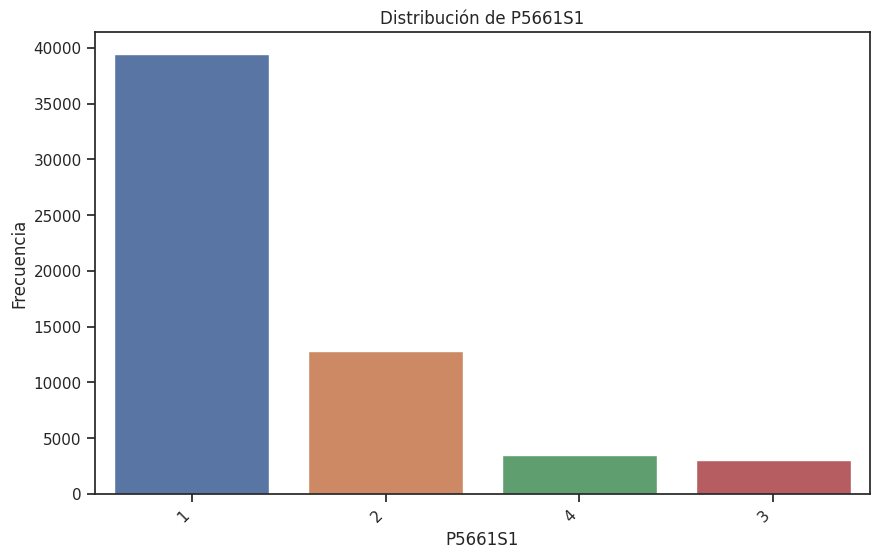

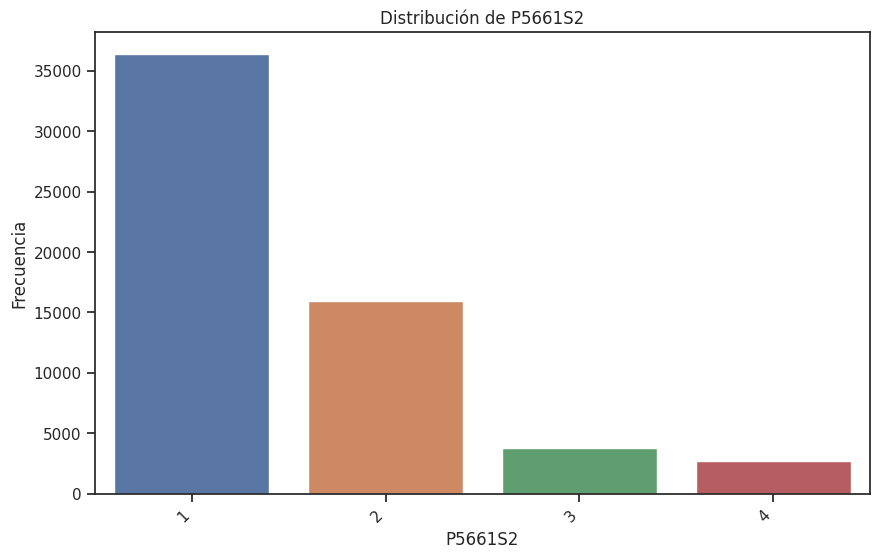

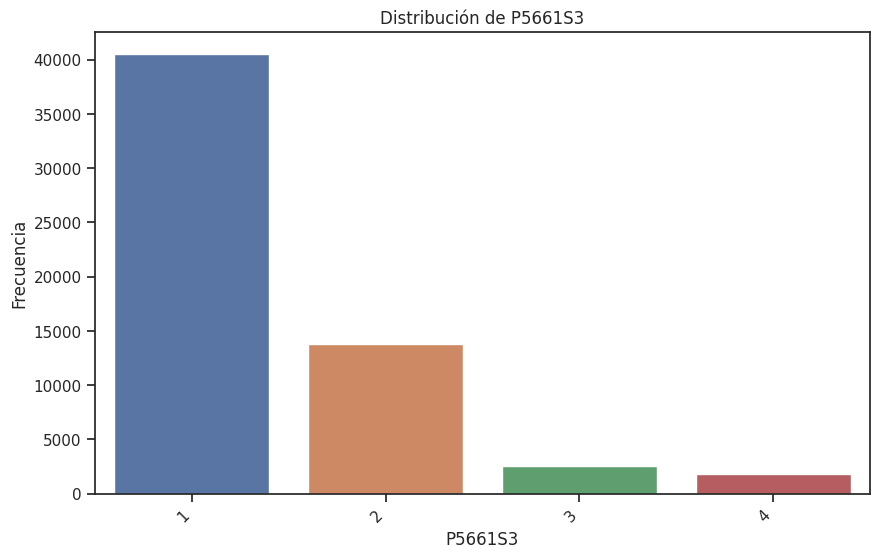

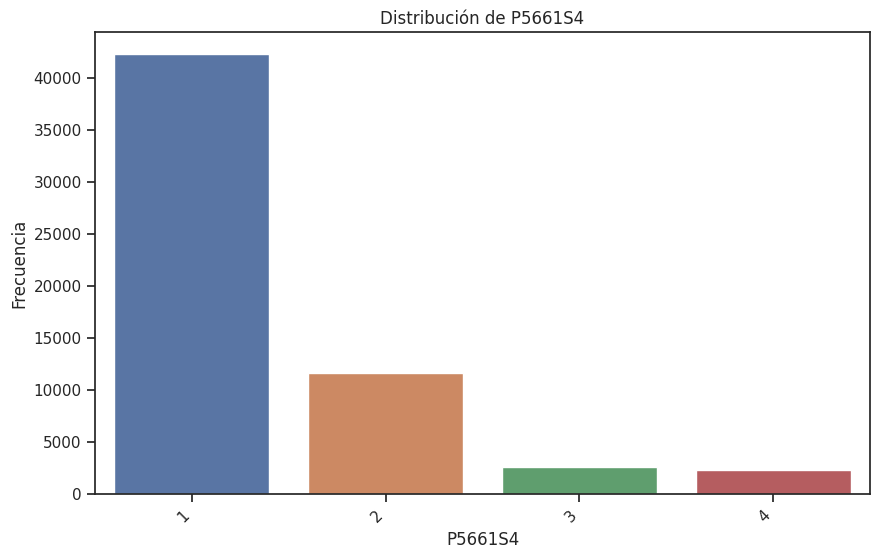

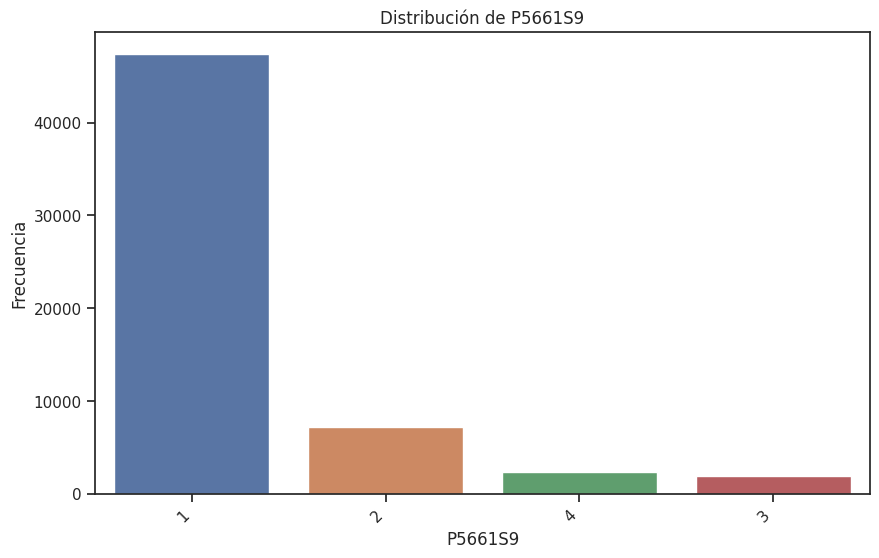

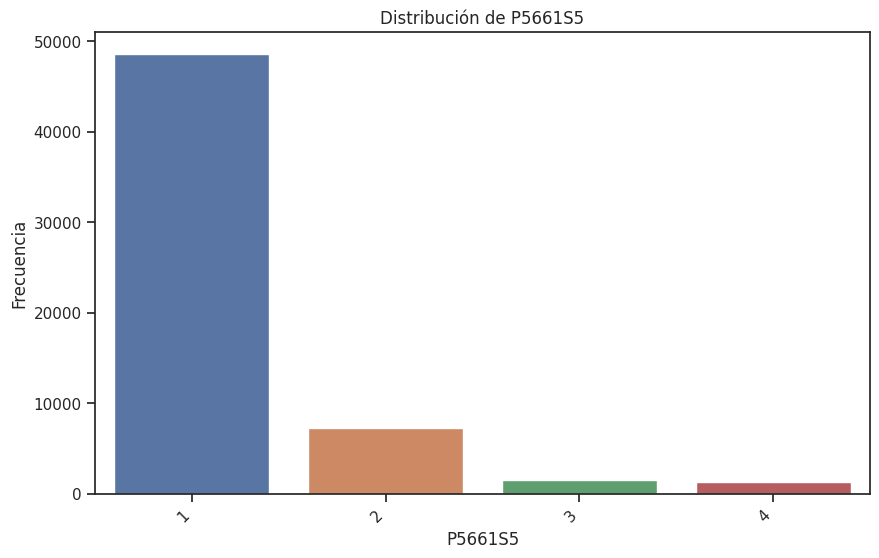

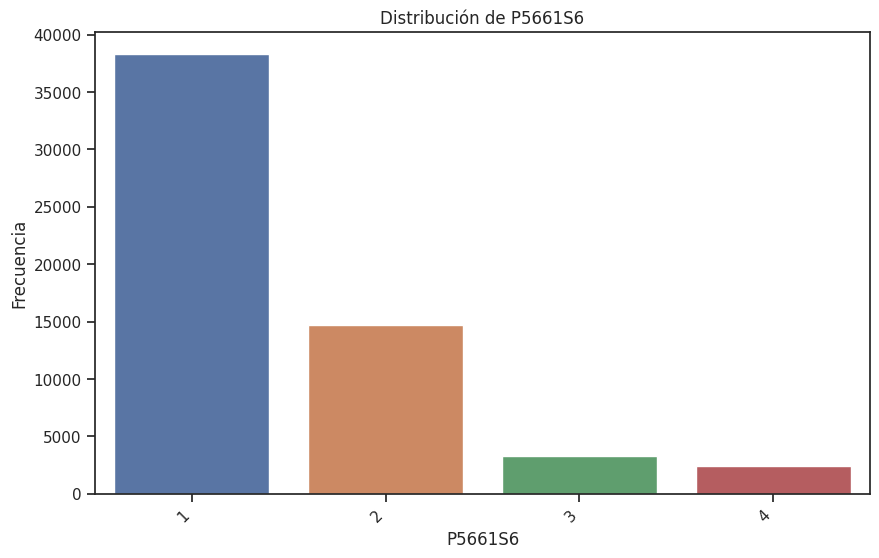

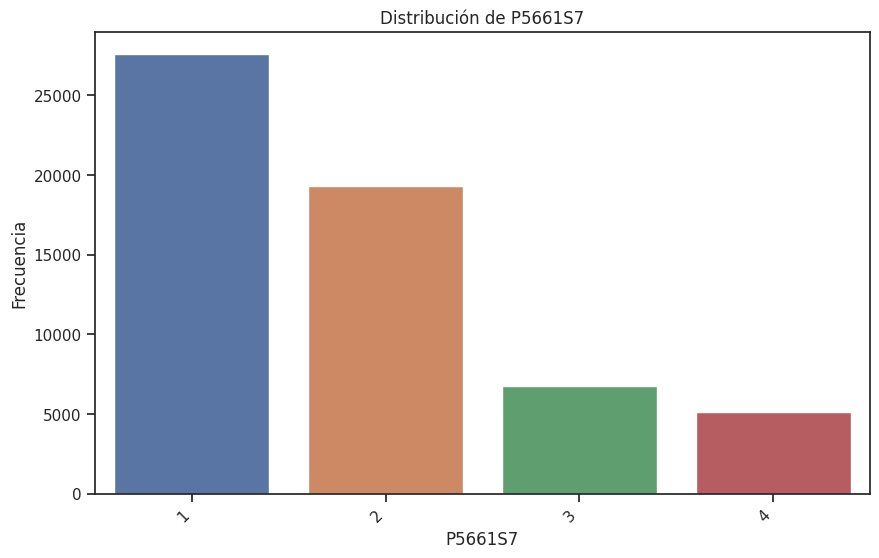

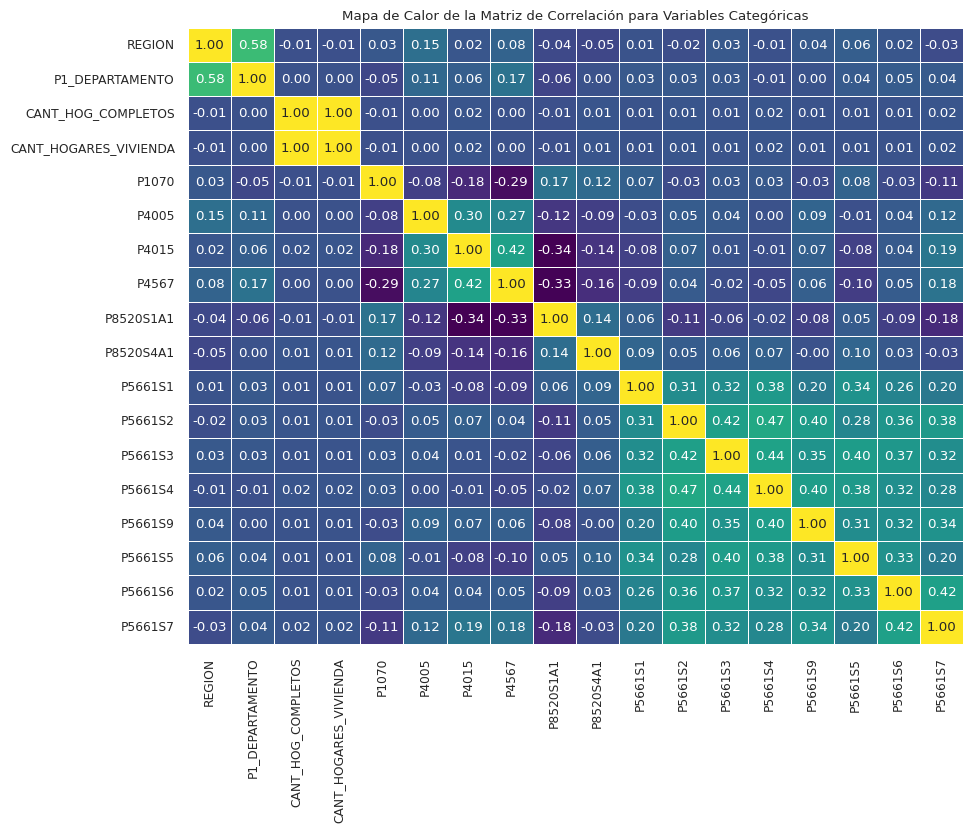

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable h

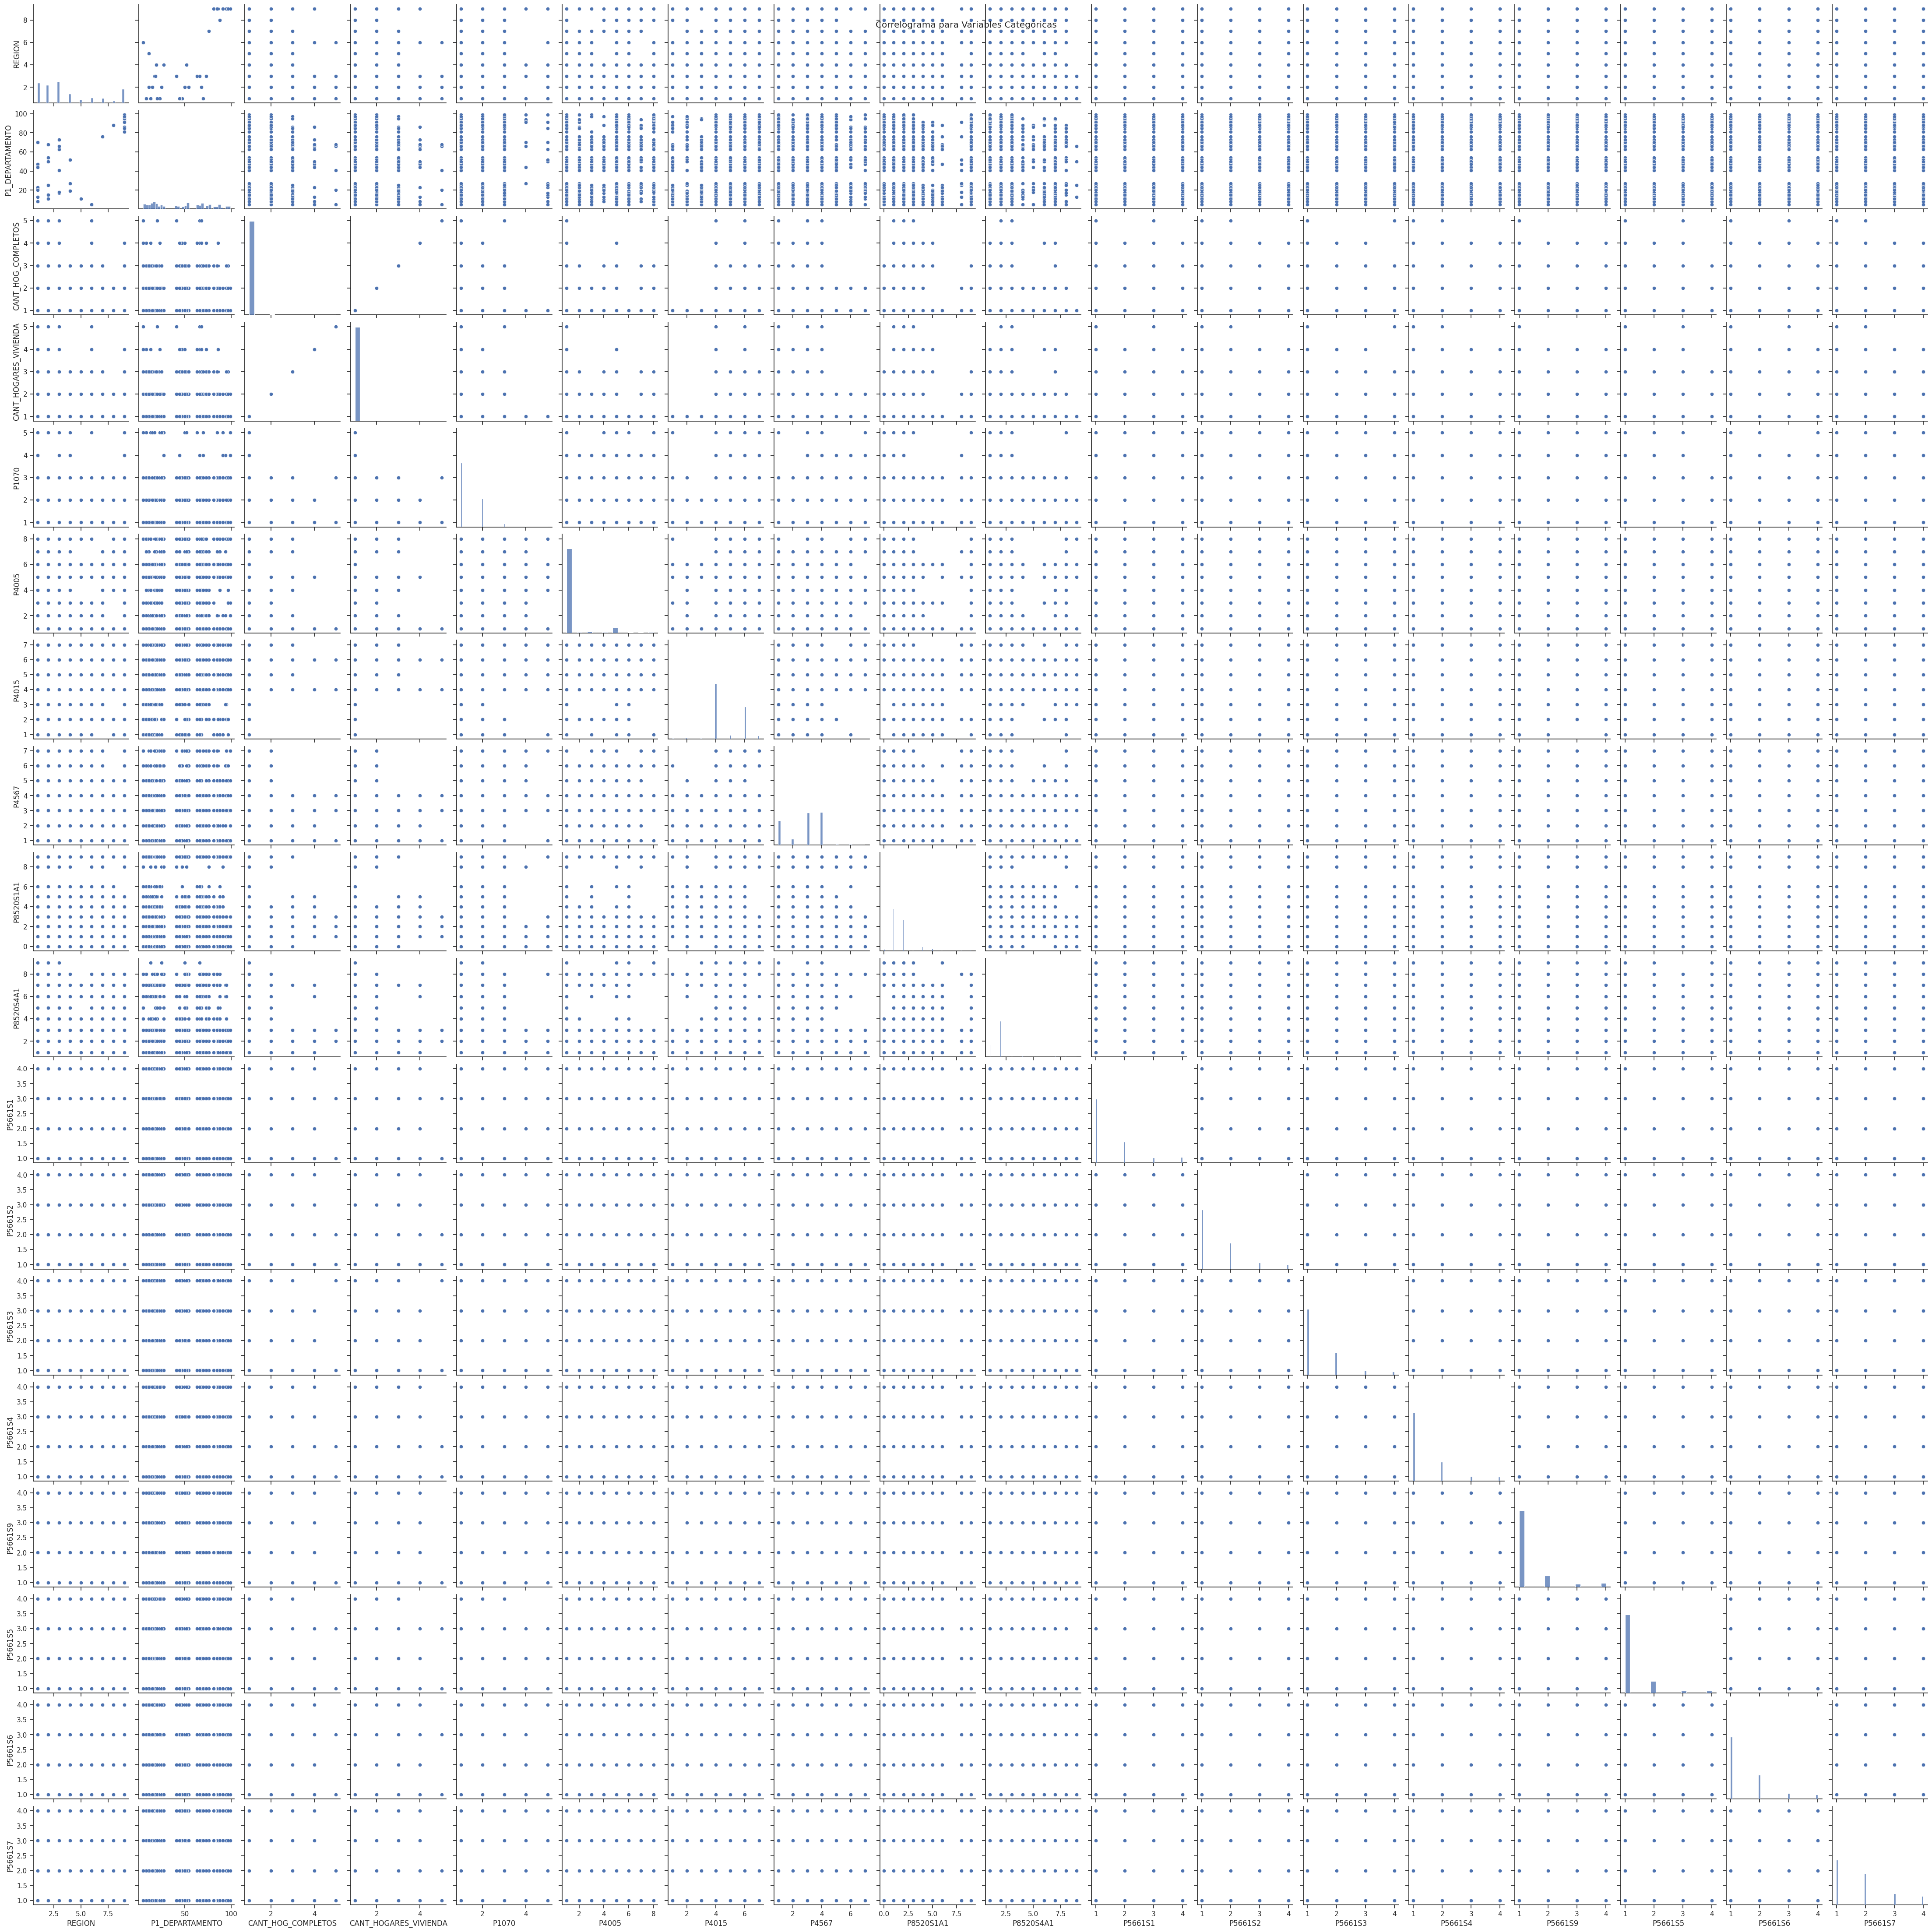

In [ ]:
# Estadísticas descriptivas para columnas categóricas
desc_stats_categoricas = df[categoricas].describe()
print("Estadísticas Descriptivas para las columnas categóricas numéricas: \n")
print(desc_stats_categoricas)

print("Gráficas para las columnas categóricas numéricas: \n")
# Gráficos para columnas categóricas
for col in categoricas:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45, horizontalalignment='right')

print("\nMatriz de correlación para los datos categóricos: \n")
# Calcular la matriz de correlación
correlation_matrix = df[categoricas].corr()
print(correlation_matrix)

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(10, 8))
sns.set(font_scale=0.8)  # Ajustar el tamaño de la fuente
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5, fmt=".2f", cbar=False)
plt.title('Mapa de Calor de la Matriz de Correlación para Variables Categóricas')
plt.show()

# Crear un correlograma
sns.set(style="ticks")
sns.pairplot(df[categoricas], kind="scatter", palette='viridis')
plt.suptitle('Correlograma para Variables Categóricas')
plt.show()

Se analizan entonces las variables categóricas númericas, se empieza el análisis a través de analíticas descriptivas por medio del atributo “.describe()”, ya que estamos hablando de variables categóricas, a no ser que sean categóricas ordinales, hay estadísticas que no nos dirían mucho, sin embargo si existe un análisis interesante para las categóricas ordinales por ejemplo, si se analiza la variable “CANT_HOGARES_VIVIENDA” la cual es categórica ordinal, es interesante ver cómo a través de las estadísticas se puede apreciar que en promedio todas las personas encuestadas comparten su hogar con 1.0122 familias, también se aprecia una desviación para esta variable de 0.1337 lo cual nos da una idea de la dispersión de los datos alrededor de la media y nos da una idea de como parece ser que en la mayoría de hogares hay más de una familia. Para el caso de las variables categóricas sin embargo, no es muy útil el análisis ya que la categoría no representa ordinalidad, por ejemplo, la variable “P1_DEPARTAMENTO” asigna un número representativo a cada departamento, por lo cual el análisis numérico de estos elementos no es representativo.

Para puntualizar en el análisis anterior, y a través de la librería Matplotlip, se realizan gráficas de cada una de estas variables categóricas con el fin de evaluar la distribución de cada variable y su frecuencia, esto es particularmente útil para observar la distribución de los datos en las variables categóricas no ordinales ya que soporta la frecuencia y distribución de datos por cada variable, primero, puede concluirse por medio de estas que todas las clases están desbalanceadas, se observa que en la mayoría de los datos hay predominancia por una o dos de las posibles categorías.

Finalmente, se evalúa la relación lineal entre las variables categóricas a través de 3 elementos: la matriz de correlaciones, el mapa de calor y el correlograma. A través de la matriz de correlaciones, se expresa a través de una tabla la relación lineal entre los pares posibles de variables, se ve reflejado de forma gráfica en el mapa de calor el cual toma valores cercanos a amarillo a medida que va aumentando la relación lineal positiva entre los variables y a morado cuando aumenta la relación lineal negativa. En las variables, puede observarse que no hay una predominancia marcada de relaciones lineales entre las variables, sin embargo, hay algunos pares de variables con cierta predominancia a la linealidad (aunque no muy fuerte), por ejemplo se puede observar cierta tendencia a la linealidad negativa entre las variables “P8520S4A1” y “P4015” con un indicador de correlación de -0.34, se observa también cierta tendencia a correlación lineal positiva entre por ejemplo las variables “P5661S4” y “P5661S2” con un índice de correlación de 0.47. Se realiza también un análisis de correlogramas el cual no dice tanto como las gráficas y tabla de correlaciones mencionadas con anterioridad, no se observan patrones muy claros de tendencia lineal entre las variables, además al ser variables discretas categóricas no es visualmente tan representativo.

No se realiza análisis de la variable de texto ya que es una y sus estadísticas descriptivas no arrojan resultados o elementos relevantes para el estudio.


<ipython-input-66-720336d17122>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


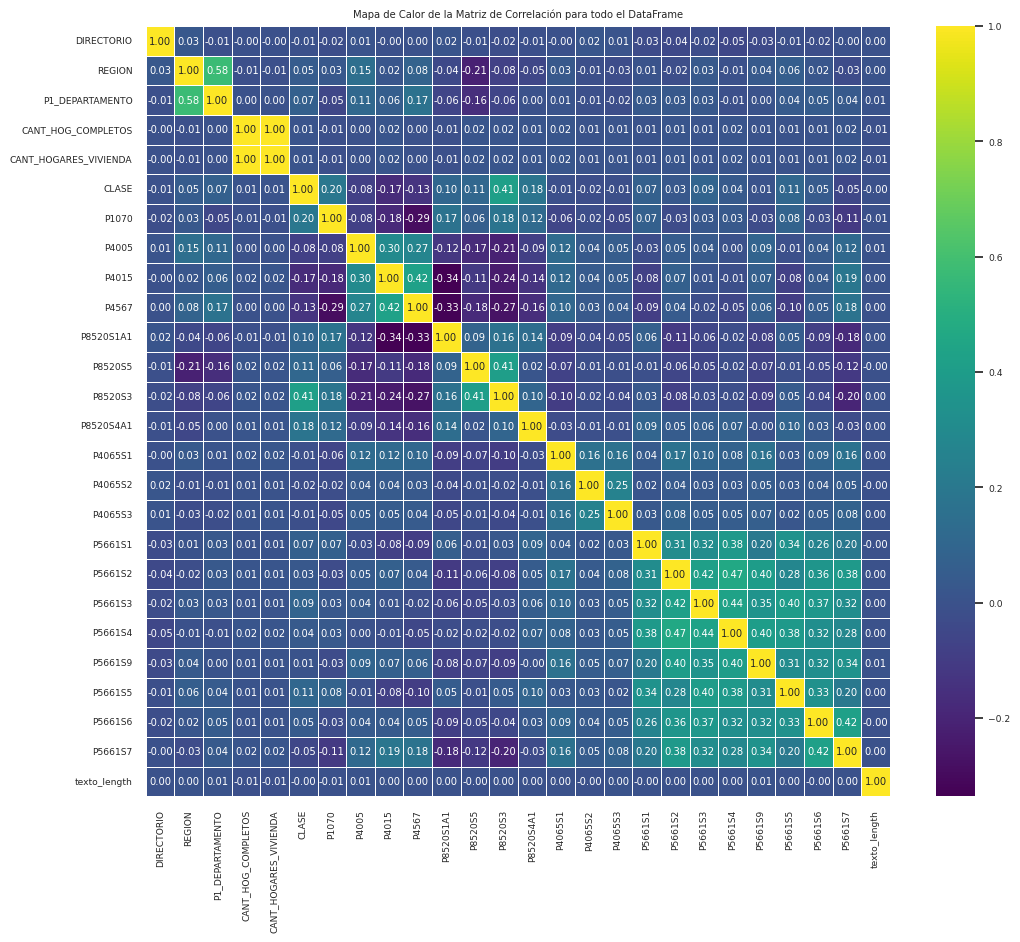

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear un mapa de calor optimizado
plt.figure(figsize=(12, 10))  # Aumentar el tamaño de la figura
sns.set(font_scale=0.6)  # Ajustar el tamaño de la fuente
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5, fmt=".2f", cbar=True)
plt.title('Mapa de Calor de la Matriz de Correlación para todo el DataFrame')

plt.show()

Finalmente, se realiza un último gráfico que agrupa todas las variables, se hace un mapa de calor que permite identificar relaciones lineales entre los pares de variables, no se encuentran grandes hallazgos con respecto al análisis hecho con anterioridad, se evidencias algunas relaciones débiles de relación lineal, por ejemplo, se observa un indicio de relación lineal negativa entre “P8520S1A1” y “P4015” con un coeficiente de correlación de -0.34, se evidencia también indicios de correlación positiva entre algunos pares de variables, por ejemplo entre “P5661S4” y “P5661S2” se evidencia un indicio de correlación positiva con un índice de 0.47. Es interesante resaltar como la variable de tipo texto no representa ningún tipo de relación lineal con las otras variables.